Inteligentne systemy wspomagania decyzji
<br>
Informatyka st. II, semestr 1
<br>
Projekt: 1
<br>
Temat: Zasada odpornej regresji porządkowej
<br>
Jakub Kondys, 151839
<br>
Kacper Dąbrowski, 151521

Wariant KD: 14 oraz 25 inf pref: Wydajność produkcji energii elektrycznej wzrośnie w przyszłości. Dodatkowo nie
chcę brać pożyczek.
<br>
Wariant JK: 13 oraz 16 inf pref: W skutek wyczerpywania się złóż materiałów radioaktywnych, elektrownie mogą
zacząć korzystać z bardziej ubogich złóż, co przełoży się na zwiększenie ilości odpadów radioaktywnych.
<br>
Reszta wariantów:
- 1 oraz 3
- 17 oraz 27
- 9 oraz 18

Decydent musi podjąć trzy akcje dotyczące innych aspektów:
- Czas składowania tymczasowego ($S_1,S_2,S_3$)
    - $S_1$ - ILW(Intermediate Level Waste): 10, HLW(High Level Waste): 30
    - $S_2$ - ILW:30, HLW: 30
    - $S_3$ - ILW: 50, HLW: 50

- Wybór miejsca składowania spośród ($R_1,R_2,R_3$)
- Sposób finansowania ($F_1,F_2,F_3$)
    - $F_1$ - Płatność za każdą wygenerowaną KWh
    - $F_2$ - Bazuje na właściwości nielimitowanej odpowiedzialności osoby wytwarzającej odpady? Coś tam koszty
    - $F_3$ - Płatność za wytwarzane odpady. Jest finansowane z pożyczki

Dla informacji preferencji 1 $F_2$ jest najbardziej preferowany, jest też zgodny z wariantem 2 także git.

Porównanie wariantów:
- Wariant $14 > 25$
- Wariant $13 ~ 16$

In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, value, LpStatus

In [10]:
df = pd.read_csv("Nuclear waste management.csv", index_col=0)
df.columns = ["C1 Koszt", "C2 Koszt", "C3 Koszt", "C4 Koszt"]
df

,C1 Koszt,C2 Koszt,C3 Koszt,C4 Koszt
1,0.60,0.93,0.00,0.73
2,0.66,0.55,0.45,0.49
3,1.00,0.45,0.57,0.50
4,0.48,0.87,0.00,0.75
5,0.62,0.40,0.56,0.50
6,0.78,0.27,0.71,0.50
7,0.40,0.90,0.00,0.82
8,0.64,0.44,0.54,0.54
9,0.65,0.30,0.71,0.55
10,0.45,0.86,0.00,0.73


## Problem Formulation
Let's consider a simple problem:

Maximize: $$Z = 4x + 3y$$
Subject to:
$$2x + y \leq 20$$
$$x + y \leq 12$$
$$x, y \geq 0$$

In [5]:


# Create a problem variable:
prob = LpProblem("Maximize_the_profit_Z", LpMaximize)

# Create problem variables:
x = LpVariable("x", lowBound=0, upBound=None) # x>=0
y = LpVariable("y", lowBound=0, upBound=None) # y>=0


In linear programming problems, the objective function represents the quantity which needs to be minimized or maximized. It does not have constraints like `<=` or `>=`. On the other hand, constraints are the restrictions or limitations on the variables. They have a certain form based on the problem requirements, often represented with `<=`, `>=`, or `==`.

In [6]:

# The objective function and constraints are added using the += operator to our model.
# Objective function Z
prob += 4*x + 3*y, "Profit"

# Constraints
prob += 2*x + y <= 20
prob += x + y <= 12

<b>Note: The names of variables or constraints must be unique and special characters must not appear, e.g. `=`,`<`,`>`.

In [7]:
# Problem
prob

Maximize_the_profit_Z:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: 2 x + y <= 20

_C2: x + y <= 12

VARIABLES
x Continuous
y Continuous

In [8]:
# Solve the problem
prob.solve()
print("Status:", LpStatus[prob.status])

# Print the optimal production amount of x and y
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the optimal profit
print("Total profit is: ", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kacper/Pulpit/Programowanie Python/.venv/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/af7ff78c923d41a096f6fbd5cfac999f-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/af7ff78c923d41a096f6fbd5cfac999f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 6.9999998 (2)
0  Obj -0 Dual inf 6.9999998 (2)
2  Obj 44
Optimal - objective value 44
Optimal objective 44 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Status: Optimal
x = 8.0
y = 4.0
Total profit 

# Second Example: Solving a Knapsack Problem
In this example, we will solve a knapsack problem. We have a set of items, each with a weight and a value, and we want to determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.

Maximize:
$$Z = 50x_1 + 100x_2 + 120x_3$$
Subject to:
$$10x_1 + 20x_2 + 30x_3 \leq 50$$
$$x_1, x_2, x_3  \in \{0,1\}$$

In [9]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem(name="Knapsack_Problem", sense=LpMaximize)

# The 3 binary variables that can only take values of 0 or 1
x1 = LpVariable(name="Item1", cat='Binary')
x2 = LpVariable(name="Item2", cat='Binary')
x3 = LpVariable(name="Item3", cat='Binary')

# The objective function is added to 'prob'
prob += lpSum([50*x1, 100*x2, 120*x3]), "Total Value of Items in Knapsack"

# Constraint
prob += lpSum([10*x1, 20*x2, 30*x3]) <= 50, "Total Weight of Items in Knapsack"

In [10]:
# Solve the problem
prob.solve()
print("Status:", LpStatus[prob.status])

# Print the optimal solution
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the optimal total value
print("Total value of items in knapsack is: ", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kacper/Pulpit/Programowanie Python/.venv/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/0291088813a44cbb82536f21ee308abc-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/0291088813a44cbb82536f21ee308abc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 19 RHS
At line 21 BOUNDS
At line 25 ENDATA
Problem MODEL has 1 rows, 3 columns and 3 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 230 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 1 rows, 3 columns (3 integer (3 of which binary)) and 3 elements
Cutoff increment increased from 1e-05 to 9.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -220
Cbc0038I Before mini br

# Third Example: Using Binary Variables as Switches
In this example, we will use a binary variable as a switch to control whether certain constraints are active or not. This is a common technique in linear programming when we want to model conditional constraints.

Maximize: $$Z = b_1 + b_2 + b_3$$
Subject to:
$$x + y + M(1-b_1) \geq 50$$
$$x + 2y + M b_1 \leq 100$$
$$3x + 2y + M(1-b_2) \geq 50$$
$$-x + 5y + M b_3 > 75$$
$$x \geq 0, x \leq 8$$
$$y \geq 0$$
$$b_1, b_2, b_3 \in \{0,1\}$$

In [11]:
prob = LpProblem(name="Switch_Problem", sense=LpMaximize)

# The variables are created
x = LpVariable(name="x", lowBound=0,upBound=8)
y = LpVariable(name="y", lowBound=0)
b1 = LpVariable(name="b1", cat='Binary')
b2 = LpVariable(name="b2", cat='Binary')
b3 = LpVariable(name="b3", cat='Binary')

# The objective function is added to 'prob' first
prob += lpSum([b1,b2,b3]), "Total Value"


M = 1000  # A very large number
eps = 0.00001# A very small number
prob += lpSum([x, y]) + M*(1-b1)>= 50 , "Weight constraint when b1 is 1"
prob += lpSum([x, 2*y]) + M*b1 <= 100 , "Weight constraint when b1 is 0"
prob += lpSum([3*x, 2*y]) + M*(1-b2)>= 50 , "Weight constraint when b2 is 1"
# It is not possible to model sharp inequalities `>` or `<` in solver,
# in order to model them a small epsilon value is added artificially to the non-sharp equations.
prob += lpSum([-x, 5*y]) + M*b3 >= 75+eps , "Weight constraint when b3 is 0"


In [12]:
# Solve the problem
prob.solve()
print("Status:", LpStatus[prob.status])

# Print the optimal solution
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the optimal total value
print("Total value is: ", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kacper/Pulpit/Programowanie Python/.venv/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/06b280f3a1214352aada6ec3af5b82f6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/06b280f3a1214352aada6ec3af5b82f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 31 RHS
At line 36 BOUNDS
At line 41 ENDATA
Problem MODEL has 4 rows, 5 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2.066 - 0.00 seconds
Cgl0004I processed model has 2 rows, 3 columns (1 integer (1 of which binary)) and 5 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -2
Cbc0038I Relaxing continuous gives -2
Cbc0038I Before mini branch and bound, 1 integers at bound 

# Fourth example: A simplified version of the UTA method

The following is an example code solving the problem of ranking alternatives using the UTA method. Consider a problem with two competing criteria C_1 and C_2.

The following example demonstrates the application of the UTA method for ranking alternatives based on two competing criteria, $C_1$ and $C_2$.  

- Criterion $C_1$ is evaluated using numerical values \($[0, 25, 50, 75, 100]$ (0: least preferred, 100: most preferred)\),

- Criterion $C_2$ is assessed using qualitative ratings \($['Bad', 'Poor', 'Neutral', 'Good', 'Excellent']$ ('Bad': worst, 'Excellent': best)\).

Both criteria are relevant, but their weights can not exceed $0.75$.

In this example, four reference alternatives are randomly assigned values from the available criteria levels. In real-world applications, these values would be determined by a decision maker.

Additionally, the decision maker provides preference information, stating that:
-  $a_1 > a_2$
-  $a_1 > a_3$
-  $a_2 > a_4$

The objective of this setup is not to optimize some objective function but rather to verify whether a system of equations satisfying these preferences has a feasible solution.

Run this example several times and see that for some data sets there is a solution and for some the system of equations is contradictory.

In [13]:
# Define criteria values
criterion1_values = [0, 25, 50, 75, 100]
criterion2_values = ["Bad", "Poor", "Neutral", "Good", "Excellent"]

# Create LP problem
prob = LpProblem("Simplified_UTA_Method", LpMaximize)

# Create decision variables for criteria
criterion1_vars = {val: LpVariable(f"criterion1_{val}", lowBound=0, upBound=1) for val in criterion1_values}
criterion2_vars = {val: LpVariable(f"criterion2_{val}", lowBound=0, upBound=1) for val in criterion2_values}

# Monotonicity constraints
for i in range(len(criterion1_values) - 1):
    prob += criterion1_vars[criterion1_values[i]] <= criterion1_vars[criterion1_values[i + 1]], f"Monotonicity_C1_{i}"
for i in range(len(criterion2_values) - 1):
    prob += criterion2_vars[criterion2_values[i]] <= criterion2_vars[criterion2_values[i + 1]], f"Monotonicity_C2_{i}"

# Normalization constraints
prob += criterion1_vars[0] == 0, "Normalize_C1_Lowest"
prob += criterion2_vars["Bad"] == 0, "Normalize_C2_Lowest"
prob += criterion1_vars[100] + criterion2_vars["Excellent"] == 1, "Normalize_Criteria_Sum"

# Weight constraints (not part of UTA but additional constraint)
prob += criterion1_vars[100] <= 0.75, "Weight_C1_Limit"
prob += criterion2_vars["Excellent"] <= 0.75, "Weight_C2_Limit"

# Define alternatives with random evaluations
alternatives = {
    f"Alternative{i+1}": {
        "C1": random.choice(criterion1_values),
        "C2": random.choice(criterion2_values)
    }
    for i in range(4)
}

# Create utility variables and constraints
alternative_utilities = {}
for name, evals in alternatives.items():
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var

    # Sum of selected criteria variables defines utility
    prob += utility_var == lpSum([criterion1_vars[evals["C1"]], criterion2_vars[evals["C2"]]]), f"Utility_{name}"

# Preference constraints provided by the decision maker
epsilon = 0.01 # Small value to ensure strict preference
prob += alternative_utilities["Alternative1"] >= alternative_utilities["Alternative2"] + epsilon, "Pref_A1_A2"
prob += alternative_utilities["Alternative1"] >= alternative_utilities["Alternative3"] + epsilon, "Pref_A1_A3"
prob += alternative_utilities["Alternative2"] >= alternative_utilities["Alternative4"] + epsilon, "Pref_A2_A4"

# No specific objective function; checking feasibility
# You need to write your own objective function depending on the variant of the UTA method.

prob += 0 # Placeholder objective function

# Solve the problem
prob.solve()

# Print results
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))
# In the results below, there is  __dummy = None which is a placeholder for the objective function.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kacper/Pulpit/Programowanie Python/.venv/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/5623d6bf4d4b4ecba8a6639068a0b55e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/5623d6bf4d4b4ecba8a6639068a0b55e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 25 COLUMNS
At line 67 RHS
At line 88 BOUNDS
At line 100 ENDATA
Problem MODEL has 20 rows, 15 columns and 40 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 1e-08 - largest nonzero change 0 ( 0%) - largest zero change 1.5904057e-08
0  Obj -0 Primal inf 1.0299996 (4)
10  Obj -2.1925082e-08 Primal inf 0.0199998 (2)
Primal infeasible - objective value -2.1925082e-08
Primal

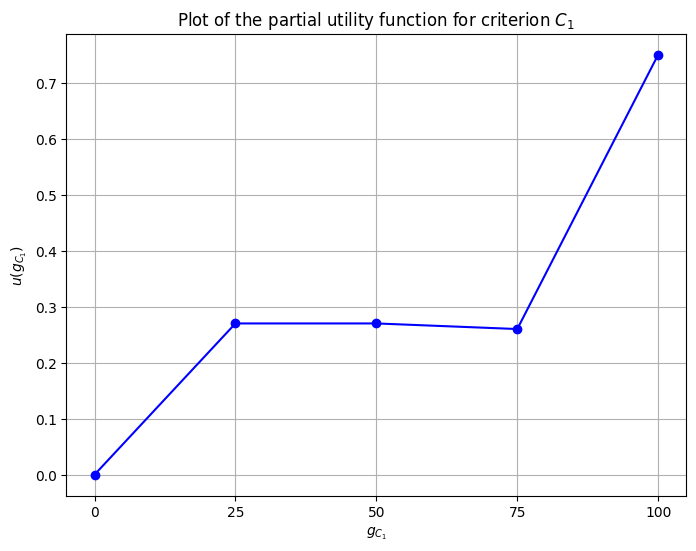

In [14]:
# This example demonstrates how to plot the partial utility function for criterion 1
solver_values = [value(criterion1_vars[val]) for val in criterion1_values]

plt.figure(figsize=(8, 6))
plt.plot(criterion1_values, solver_values, marker='o', linestyle='-', color='b', label='$u(g_{C_1})$')
plt.xlabel('$g_{C_1}$')
plt.ylabel('$u(g_{C_1})$')
plt.title('Plot of the partial utility function for criterion $C_1$')
plt.xticks(criterion1_values)
plt.grid(True)
plt.show()
